In [1]:
#import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import os
import pickle
import seaborn as sns
import datetime as dt
from model import StockEnv,get_scaler, play_one_episode, LinearModel, DQNAgent
from tqdm.notebook import tqdm
import pyfolio as pf
%matplotlib inline

C:\Users\User\anaconda3\envs\MyDjango\lib\site-packages\pyfolio\pos.py:26: UserWarning: Module "zipline.assets" not found; mutltipliers will not be applied to position notionals.
  warnings.warn(


Stock name: XLM-USD
Start: 2021-01-22 17:00:00+00:00, End: 2021-03-22 14:30:00+00:00
Training data: 1295 
Tsesting data: 1295 


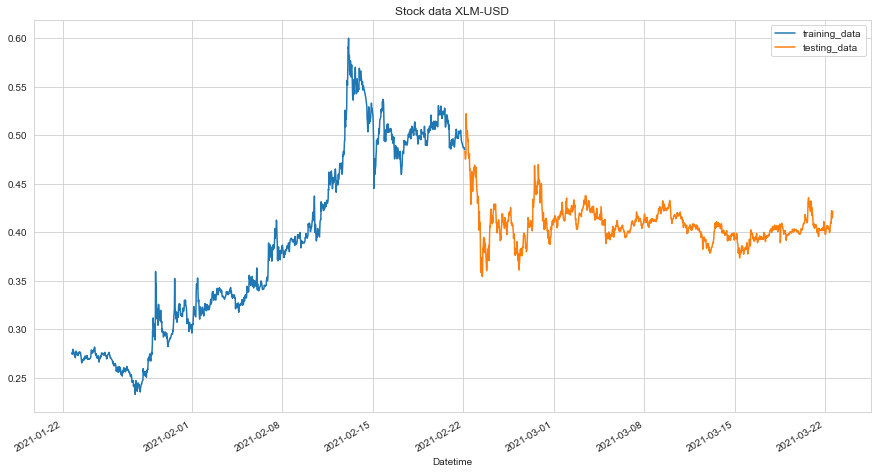

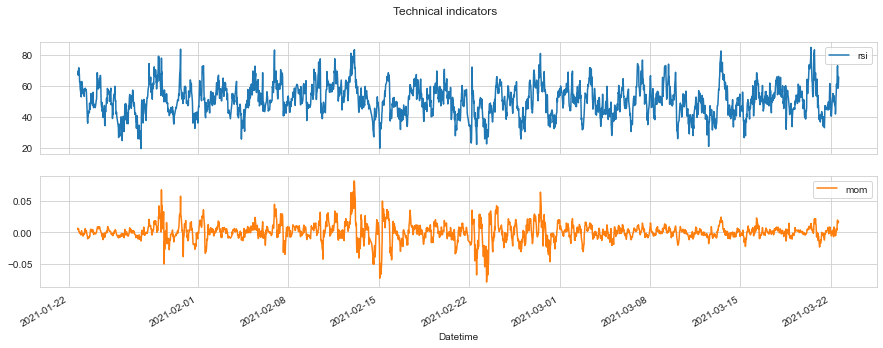

In [2]:
stock_name = 'xlm-usd'.upper()
industry = 'Cryptocurrency'
stock_data = pd.read_csv(f'data/{stock_name}.csv', index_col=['Datetime'], parse_dates=True)
n_train = len(stock_data)//2

train_data = stock_data.iloc[:n_train]
test_data = stock_data.iloc[n_train:]

print(f'Stock name: {stock_name}')
print(f'Start: {stock_data.index[0]}, End: {stock_data.index[-1]}')
print(f'Training data: {len(train_data)} ')
print(f'Tsesting data: {len(test_data)} ')

sns.set_style('whitegrid')
train_data['Adj Close'].plot(label='training_data', figsize=(15,8));
test_data['Adj Close'].plot(label='testing_data');
plt.title('Stock data '+ stock_name)
plt.legend();
plt.show()

stock_data[['rsi', 'mom']].plot(subplots=True, figsize=(15,5), title='Technical indicators');
plt.show()




In [3]:
num_episodes = 2000
batch_size = 32
capital = 1000
data = stock_data['Adj Close'].values
n_timesteps = data.shape[0]


env = StockEnv(train_data, capital)
state_size = env.state_dim
action_size = 2
agent = DQNAgent(state_size, action_size)
scaler = get_scaler(env)

  0%|          | 0/2000 [00:00<?, ?it/s]

episode: 1/2000, episode end value: 1332.78, duration: 0:00:00.251056
episode: 2/2000, episode end value: 1366.74, duration: 0:00:00.246055
episode: 3/2000, episode end value: 1354.38, duration: 0:00:00.269061
episode: 4/2000, episode end value: 1366.78, duration: 0:00:00.278062
episode: 5/2000, episode end value: 1373.29, duration: 0:00:00.283063
episode: 6/2000, episode end value: 1371.91, duration: 0:00:00.290064
episode: 7/2000, episode end value: 1370.91, duration: 0:00:00.262060
episode: 8/2000, episode end value: 1371.71, duration: 0:00:00.282064
episode: 9/2000, episode end value: 1371.76, duration: 0:00:00.286062
episode: 10/2000, episode end value: 1369.26, duration: 0:00:00.283064
episode: 11/2000, episode end value: 1371.71, duration: 0:00:00.272061
episode: 12/2000, episode end value: 1372.64, duration: 0:00:00.298066
episode: 13/2000, episode end value: 1371.45, duration: 0:00:00.279064
episode: 14/2000, episode end value: 1372.03, duration: 0:00:00.284062
episode: 15/200

episode: 117/2000, episode end value: 1370.66, duration: 0:00:00.326072
episode: 118/2000, episode end value: 1373.60, duration: 0:00:00.312070
episode: 119/2000, episode end value: 1370.90, duration: 0:00:00.313071
episode: 120/2000, episode end value: 1370.52, duration: 0:00:00.314070
episode: 121/2000, episode end value: 1371.51, duration: 0:00:00.319074
episode: 122/2000, episode end value: 1372.26, duration: 0:00:00.310070
episode: 123/2000, episode end value: 1371.15, duration: 0:00:00.323070
episode: 124/2000, episode end value: 1371.22, duration: 0:00:00.321071
episode: 125/2000, episode end value: 1371.90, duration: 0:00:00.328077
episode: 126/2000, episode end value: 1371.67, duration: 0:00:00.302066
episode: 127/2000, episode end value: 1371.52, duration: 0:00:00.364081
episode: 128/2000, episode end value: 1371.35, duration: 0:00:00.359085
episode: 129/2000, episode end value: 1374.99, duration: 0:00:00.332072
episode: 130/2000, episode end value: 1371.04, duration: 0:00:00

episode: 231/2000, episode end value: 1370.95, duration: 0:00:00.328073
episode: 232/2000, episode end value: 1358.16, duration: 0:00:00.325073
episode: 233/2000, episode end value: 1372.34, duration: 0:00:00.350078
episode: 234/2000, episode end value: 1371.42, duration: 0:00:00.334077
episode: 235/2000, episode end value: 1371.12, duration: 0:00:00.330071
episode: 236/2000, episode end value: 1370.83, duration: 0:00:00.324076
episode: 237/2000, episode end value: 1373.75, duration: 0:00:00.369082
episode: 238/2000, episode end value: 1371.49, duration: 0:00:00.357078
episode: 239/2000, episode end value: 1372.05, duration: 0:00:00.353082
episode: 240/2000, episode end value: 1369.28, duration: 0:00:00.332071
episode: 241/2000, episode end value: 1371.15, duration: 0:00:00.362081
episode: 242/2000, episode end value: 1371.86, duration: 0:00:00.339078
episode: 243/2000, episode end value: 1357.05, duration: 0:00:00.318072
episode: 244/2000, episode end value: 1370.62, duration: 0:00:00

episode: 345/2000, episode end value: 1371.46, duration: 0:00:00.356077
episode: 346/2000, episode end value: 1372.49, duration: 0:00:00.349077
episode: 347/2000, episode end value: 1355.11, duration: 0:00:00.350079
episode: 348/2000, episode end value: 1372.86, duration: 0:00:00.366084
episode: 349/2000, episode end value: 1372.85, duration: 0:00:00.362080
episode: 350/2000, episode end value: 1372.27, duration: 0:00:00.353075
episode: 351/2000, episode end value: 1372.05, duration: 0:00:00.362083
episode: 352/2000, episode end value: 1371.48, duration: 0:00:00.360081
episode: 353/2000, episode end value: 1371.84, duration: 0:00:00.361079
episode: 354/2000, episode end value: 1371.07, duration: 0:00:00.360085
episode: 355/2000, episode end value: 1380.14, duration: 0:00:00.385085
episode: 356/2000, episode end value: 1372.86, duration: 0:00:00.360081
episode: 357/2000, episode end value: 1372.22, duration: 0:00:00.377085
episode: 358/2000, episode end value: 1371.48, duration: 0:00:00

episode: 459/2000, episode end value: 1363.54, duration: 0:00:00.235053
episode: 460/2000, episode end value: 1351.01, duration: 0:00:00.222052
episode: 461/2000, episode end value: 1349.77, duration: 0:00:00.254058
episode: 462/2000, episode end value: 1317.77, duration: 0:00:00.288065
episode: 463/2000, episode end value: 1354.35, duration: 0:00:00.259057
episode: 464/2000, episode end value: 1345.75, duration: 0:00:00.245051
episode: 465/2000, episode end value: 1315.67, duration: 0:00:00.282070
episode: 466/2000, episode end value: 1318.87, duration: 0:00:00.314069
episode: 467/2000, episode end value: 1347.31, duration: 0:00:00.315073
episode: 468/2000, episode end value: 1353.45, duration: 0:00:00.329074
episode: 469/2000, episode end value: 1364.20, duration: 0:00:00.350078
episode: 470/2000, episode end value: 1370.05, duration: 0:00:00.369084
episode: 471/2000, episode end value: 1371.24, duration: 0:00:00.353079
episode: 472/2000, episode end value: 1369.85, duration: 0:00:00

episode: 573/2000, episode end value: 1371.35, duration: 0:00:00.443097
episode: 574/2000, episode end value: 1372.56, duration: 0:00:00.370083
episode: 575/2000, episode end value: 1367.82, duration: 0:00:00.371083
episode: 576/2000, episode end value: 1371.44, duration: 0:00:00.363085
episode: 577/2000, episode end value: 1371.29, duration: 0:00:00.483107
episode: 578/2000, episode end value: 1371.17, duration: 0:00:00.401088
episode: 579/2000, episode end value: 1372.52, duration: 0:00:00.357079
episode: 580/2000, episode end value: 1372.13, duration: 0:00:00.405095
episode: 581/2000, episode end value: 1370.28, duration: 0:00:00.406091
episode: 582/2000, episode end value: 1371.19, duration: 0:00:00.404090
episode: 583/2000, episode end value: 1370.96, duration: 0:00:00.362081
episode: 584/2000, episode end value: 1371.45, duration: 0:00:00.369082
episode: 585/2000, episode end value: 1371.33, duration: 0:00:00.395089
episode: 586/2000, episode end value: 1371.54, duration: 0:00:00

episode: 687/2000, episode end value: 1371.29, duration: 0:00:00.387086
episode: 688/2000, episode end value: 1371.53, duration: 0:00:00.383085
episode: 689/2000, episode end value: 1372.21, duration: 0:00:00.411093
episode: 690/2000, episode end value: 1371.46, duration: 0:00:00.373086
episode: 691/2000, episode end value: 1371.37, duration: 0:00:00.369082
episode: 692/2000, episode end value: 1368.30, duration: 0:00:00.372086
episode: 693/2000, episode end value: 1371.98, duration: 0:00:00.362083
episode: 694/2000, episode end value: 1372.78, duration: 0:00:00.392079
episode: 695/2000, episode end value: 1367.66, duration: 0:00:00.369088
episode: 696/2000, episode end value: 1372.34, duration: 0:00:00.389091
episode: 697/2000, episode end value: 1372.15, duration: 0:00:00.405084
episode: 698/2000, episode end value: 1371.48, duration: 0:00:00.352077
episode: 699/2000, episode end value: 1372.18, duration: 0:00:00.407093
episode: 700/2000, episode end value: 1371.36, duration: 0:00:00

episode: 801/2000, episode end value: 1371.61, duration: 0:00:00.524274
episode: 802/2000, episode end value: 1370.76, duration: 0:00:00.531703
episode: 803/2000, episode end value: 1371.38, duration: 0:00:00.515119
episode: 804/2000, episode end value: 1372.70, duration: 0:00:00.494107
episode: 805/2000, episode end value: 1372.54, duration: 0:00:00.475106
episode: 806/2000, episode end value: 1372.23, duration: 0:00:00.503117
episode: 807/2000, episode end value: 1371.58, duration: 0:00:00.478104
episode: 808/2000, episode end value: 1371.61, duration: 0:00:00.491110
episode: 809/2000, episode end value: 1371.33, duration: 0:00:00.558125
episode: 810/2000, episode end value: 1371.93, duration: 0:00:00.476102
episode: 811/2000, episode end value: 1371.05, duration: 0:00:00.448102
episode: 812/2000, episode end value: 1370.85, duration: 0:00:00.420093
episode: 813/2000, episode end value: 1372.24, duration: 0:00:00.444099
episode: 814/2000, episode end value: 1372.33, duration: 0:00:00

episode: 915/2000, episode end value: 1371.39, duration: 0:00:00.421092
episode: 916/2000, episode end value: 1371.21, duration: 0:00:00.439095
episode: 917/2000, episode end value: 1372.00, duration: 0:00:00.412092
episode: 918/2000, episode end value: 1367.69, duration: 0:00:00.361083
episode: 919/2000, episode end value: 1371.51, duration: 0:00:00.371083
episode: 920/2000, episode end value: 1370.38, duration: 0:00:00.391088
episode: 921/2000, episode end value: 1367.89, duration: 0:00:00.369079
episode: 922/2000, episode end value: 1371.37, duration: 0:00:00.383088
episode: 923/2000, episode end value: 1370.30, duration: 0:00:00.379085
episode: 924/2000, episode end value: 1372.27, duration: 0:00:00.364081
episode: 925/2000, episode end value: 1371.55, duration: 0:00:00.364081
episode: 926/2000, episode end value: 1373.20, duration: 0:00:00.349078
episode: 927/2000, episode end value: 1371.47, duration: 0:00:00.349082
episode: 928/2000, episode end value: 1371.04, duration: 0:00:00

episode: 1029/2000, episode end value: 1371.76, duration: 0:00:00.358080
episode: 1030/2000, episode end value: 1374.26, duration: 0:00:00.374081
episode: 1031/2000, episode end value: 1379.84, duration: 0:00:00.348078
episode: 1032/2000, episode end value: 1373.31, duration: 0:00:00.331077
episode: 1033/2000, episode end value: 1341.80, duration: 0:00:00.331071
episode: 1034/2000, episode end value: 1371.09, duration: 0:00:00.364084
episode: 1035/2000, episode end value: 1372.83, duration: 0:00:00.422096
episode: 1036/2000, episode end value: 1367.57, duration: 0:00:00.400088
episode: 1037/2000, episode end value: 1372.30, duration: 0:00:00.350077
episode: 1038/2000, episode end value: 1371.65, duration: 0:00:00.343079
episode: 1039/2000, episode end value: 1370.73, duration: 0:00:00.395085
episode: 1040/2000, episode end value: 1373.49, duration: 0:00:00.430096
episode: 1041/2000, episode end value: 1374.71, duration: 0:00:00.419094
episode: 1042/2000, episode end value: 1373.73, dur

episode: 1142/2000, episode end value: 1354.16, duration: 0:00:00.352077
episode: 1143/2000, episode end value: 1372.26, duration: 0:00:00.360083
episode: 1144/2000, episode end value: 1372.56, duration: 0:00:00.339077
episode: 1145/2000, episode end value: 1370.77, duration: 0:00:00.347078
episode: 1146/2000, episode end value: 1375.29, duration: 0:00:00.358078
episode: 1147/2000, episode end value: 1372.71, duration: 0:00:00.422093
episode: 1148/2000, episode end value: 1372.95, duration: 0:00:00.344077
episode: 1149/2000, episode end value: 1370.95, duration: 0:00:00.398090
episode: 1150/2000, episode end value: 1375.01, duration: 0:00:00.364082
episode: 1151/2000, episode end value: 1371.30, duration: 0:00:00.343076
episode: 1152/2000, episode end value: 1374.24, duration: 0:00:00.353079
episode: 1153/2000, episode end value: 1370.52, duration: 0:00:00.370086
episode: 1154/2000, episode end value: 1371.19, duration: 0:00:00.364080
episode: 1155/2000, episode end value: 1371.56, dur

episode: 1255/2000, episode end value: 1359.24, duration: 0:00:00.264064
episode: 1256/2000, episode end value: 1357.11, duration: 0:00:00.255056
episode: 1257/2000, episode end value: 1352.71, duration: 0:00:00.262059
episode: 1258/2000, episode end value: 1322.43, duration: 0:00:00.279138
episode: 1259/2000, episode end value: 1388.23, duration: 0:00:00.301987
episode: 1260/2000, episode end value: 1359.94, duration: 0:00:00.274499
episode: 1261/2000, episode end value: 1388.75, duration: 0:00:00.253060
episode: 1262/2000, episode end value: 1342.57, duration: 0:00:00.238055
episode: 1263/2000, episode end value: 1335.21, duration: 0:00:00.252048
episode: 1264/2000, episode end value: 1372.63, duration: 0:00:00.244056
episode: 1265/2000, episode end value: 1347.19, duration: 0:00:00.241053
episode: 1266/2000, episode end value: 1369.61, duration: 0:00:00.240055
episode: 1267/2000, episode end value: 1396.46, duration: 0:00:00.237056
episode: 1268/2000, episode end value: 1420.09, dur

episode: 1368/2000, episode end value: 1453.52, duration: 0:00:00.234052
episode: 1369/2000, episode end value: 1323.58, duration: 0:00:00.218047
episode: 1370/2000, episode end value: 1320.69, duration: 0:00:00.255386
episode: 1371/2000, episode end value: 1350.06, duration: 0:00:00.246264
episode: 1372/2000, episode end value: 1364.46, duration: 0:00:00.228052
episode: 1373/2000, episode end value: 1309.67, duration: 0:00:00.289636
episode: 1374/2000, episode end value: 1367.57, duration: 0:00:00.227053
episode: 1375/2000, episode end value: 1357.92, duration: 0:00:00.238056
episode: 1376/2000, episode end value: 1371.79, duration: 0:00:00.271081
episode: 1377/2000, episode end value: 1429.71, duration: 0:00:00.244038
episode: 1378/2000, episode end value: 1358.32, duration: 0:00:00.220050
episode: 1379/2000, episode end value: 1384.23, duration: 0:00:00.270053
episode: 1380/2000, episode end value: 1361.58, duration: 0:00:00.214049
episode: 1381/2000, episode end value: 1354.38, dur

episode: 1481/2000, episode end value: 1370.70, duration: 0:00:00.349076
episode: 1482/2000, episode end value: 1367.17, duration: 0:00:00.318075
episode: 1483/2000, episode end value: 1438.43, duration: 0:00:00.249056
episode: 1484/2000, episode end value: 1359.97, duration: 0:00:00.257052
episode: 1485/2000, episode end value: 1369.69, duration: 0:00:00.320070
episode: 1486/2000, episode end value: 1371.01, duration: 0:00:00.340287
episode: 1487/2000, episode end value: 1369.23, duration: 0:00:00.353394
episode: 1488/2000, episode end value: 1371.70, duration: 0:00:00.330134
episode: 1489/2000, episode end value: 1372.10, duration: 0:00:00.321228
episode: 1490/2000, episode end value: 1371.36, duration: 0:00:00.335054
episode: 1491/2000, episode end value: 1371.72, duration: 0:00:00.323070
episode: 1492/2000, episode end value: 1371.38, duration: 0:00:00.339077
episode: 1493/2000, episode end value: 1371.14, duration: 0:00:00.312088
episode: 1494/2000, episode end value: 1371.53, dur

episode: 1594/2000, episode end value: 1370.61, duration: 0:00:00.321068
episode: 1595/2000, episode end value: 1371.12, duration: 0:00:00.308077
episode: 1596/2000, episode end value: 1372.11, duration: 0:00:00.310058
episode: 1597/2000, episode end value: 1372.17, duration: 0:00:00.319070
episode: 1598/2000, episode end value: 1372.28, duration: 0:00:00.314071
episode: 1599/2000, episode end value: 1370.32, duration: 0:00:00.311072
episode: 1600/2000, episode end value: 1373.35, duration: 0:00:00.310069
episode: 1601/2000, episode end value: 1371.41, duration: 0:00:00.309070
episode: 1602/2000, episode end value: 1372.86, duration: 0:00:00.319069
episode: 1603/2000, episode end value: 1365.65, duration: 0:00:00.319076
episode: 1604/2000, episode end value: 1371.08, duration: 0:00:00.329069
episode: 1605/2000, episode end value: 1368.33, duration: 0:00:00.319072
episode: 1606/2000, episode end value: 1371.82, duration: 0:00:00.335103
episode: 1607/2000, episode end value: 1370.53, dur

episode: 1707/2000, episode end value: 1371.30, duration: 0:00:00.419092
episode: 1708/2000, episode end value: 1371.27, duration: 0:00:00.485089
episode: 1709/2000, episode end value: 1371.64, duration: 0:00:00.374085
episode: 1710/2000, episode end value: 1372.24, duration: 0:00:00.356079
episode: 1711/2000, episode end value: 1370.87, duration: 0:00:00.350079
episode: 1712/2000, episode end value: 1371.03, duration: 0:00:00.342074
episode: 1713/2000, episode end value: 1373.62, duration: 0:00:00.331075
episode: 1714/2000, episode end value: 1368.04, duration: 0:00:00.341089
episode: 1715/2000, episode end value: 1370.94, duration: 0:00:00.344057
episode: 1716/2000, episode end value: 1371.02, duration: 0:00:00.342076
episode: 1717/2000, episode end value: 1370.78, duration: 0:00:00.391091
episode: 1718/2000, episode end value: 1366.65, duration: 0:00:00.376859
episode: 1719/2000, episode end value: 1371.30, duration: 0:00:00.380082
episode: 1720/2000, episode end value: 1372.19, dur

episode: 1820/2000, episode end value: 1371.70, duration: 0:00:00.266071
episode: 1821/2000, episode end value: 1368.82, duration: 0:00:00.267171
episode: 1822/2000, episode end value: 1370.90, duration: 0:00:00.267936
episode: 1823/2000, episode end value: 1364.39, duration: 0:00:00.275080
episode: 1824/2000, episode end value: 1363.04, duration: 0:00:00.265054
episode: 1825/2000, episode end value: 1372.22, duration: 0:00:00.283050
episode: 1826/2000, episode end value: 1369.48, duration: 0:00:00.281072
episode: 1827/2000, episode end value: 1369.70, duration: 0:00:00.266046
episode: 1828/2000, episode end value: 1372.01, duration: 0:00:00.263066
episode: 1829/2000, episode end value: 1371.52, duration: 0:00:00.259059
episode: 1830/2000, episode end value: 1370.35, duration: 0:00:00.277081
episode: 1831/2000, episode end value: 1373.16, duration: 0:00:00.265041
episode: 1832/2000, episode end value: 1370.05, duration: 0:00:00.273072
episode: 1833/2000, episode end value: 1371.91, dur

episode: 1933/2000, episode end value: 1371.10, duration: 0:00:00.271049
episode: 1934/2000, episode end value: 1371.27, duration: 0:00:00.271057
episode: 1935/2000, episode end value: 1372.32, duration: 0:00:00.286067
episode: 1936/2000, episode end value: 1373.85, duration: 0:00:00.275061
episode: 1937/2000, episode end value: 1369.37, duration: 0:00:00.280062
episode: 1938/2000, episode end value: 1374.85, duration: 0:00:00.275075
episode: 1939/2000, episode end value: 1371.47, duration: 0:00:00.264045
episode: 1940/2000, episode end value: 1371.44, duration: 0:00:00.266061
episode: 1941/2000, episode end value: 1371.88, duration: 0:00:00.316071
episode: 1942/2000, episode end value: 1350.82, duration: 0:00:00.242058
episode: 1943/2000, episode end value: 1354.39, duration: 0:00:00.262053
episode: 1944/2000, episode end value: 1371.62, duration: 0:00:00.291073
episode: 1945/2000, episode end value: 1358.05, duration: 0:00:00.292059
episode: 1946/2000, episode end value: 1370.78, dur

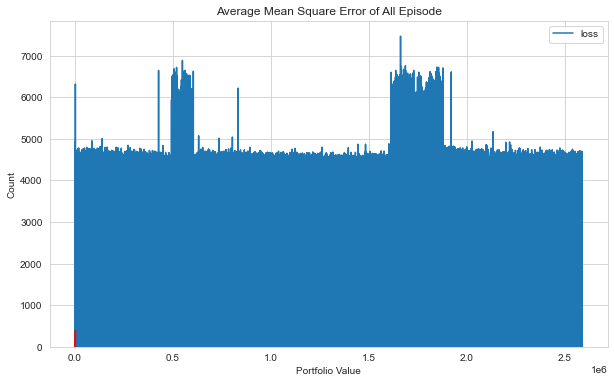

In [4]:
#train


mode = 'train'

portfolio_value = []



for e in tqdm(range(num_episodes)):
    t0 = datetime.now()
    val = play_one_episode(agent, env, mode, scaler)
    dt = datetime.now() - t0
    print(f"episode: {e + 1}/{num_episodes}, episode end value: {val['portfolio_value'][-1]:.2f}, duration: {dt}")
    portfolio_value.append(val['portfolio_value'][-1]) 


if mode == 'train':
    # save the DQN
    agent.save(f'state_dict/{stock_name}.npz')

    # save the scaler
    with open(f'scaler/{stock_name}.pkl', 'wb') as f:
        pickle.dump(scaler, f)

    # plot losses
    loss = agent.model.losses
    losses = pd.DataFrame(loss, columns=['loss'])
    losses.plot(figsize=(10,6))
    plt.title('Average Mean Square Error of All Episode')
    plt.xlabel('Step')
    plt.ylabel('Mean Square Error')

print(f'average reward: {np.mean(portfolio_value):.2f}, min: {np.min(portfolio_value):.2f}, max: {np.max(portfolio_value):.2f}')
sns.histplot(portfolio_value, bins=100, color='r', kde=True);
plt.xlabel('Portfolio Value');
plt.ylabel('Count');

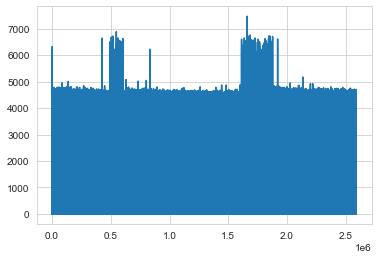

In [5]:
plt.plot(agent.model.losses)

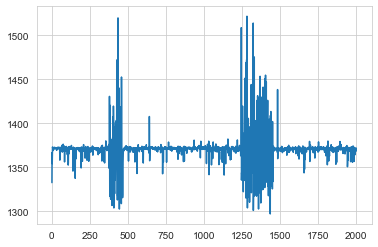

In [6]:
plt.plot(portfolio_value)

episode end value: 1038.62, duration: 0:00:00.085016
Sell: 1 times, Buy: 3 times


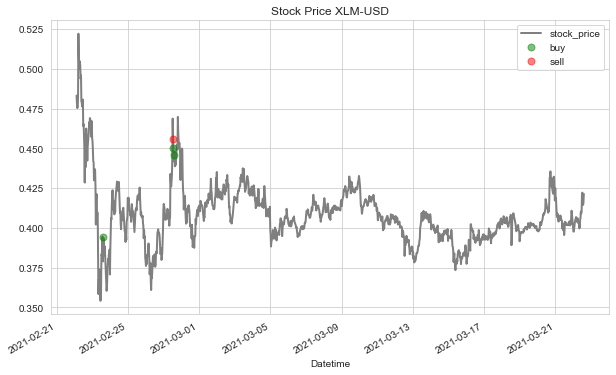

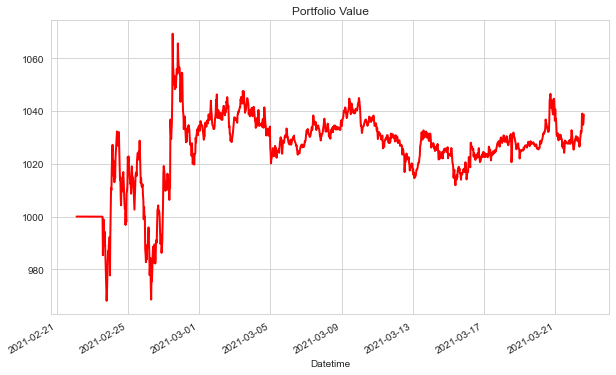

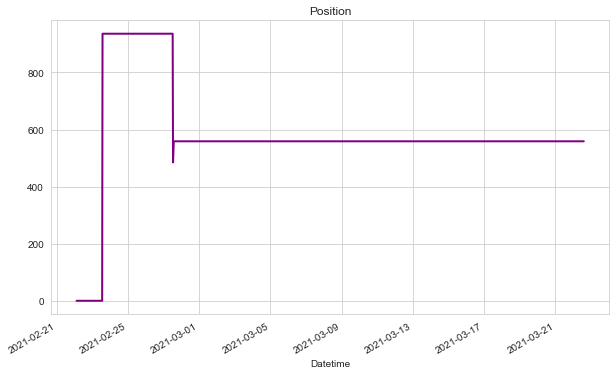

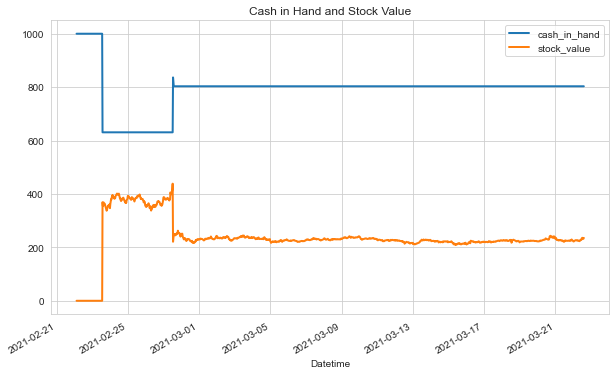

In [7]:
#test

mode = 'test'

portfolio_value = []


with open(f'scaler/{stock_name}.pkl', 'rb') as f:
    scaler = pickle.load(f)
    
env = StockEnv(test_data, capital)
agent.epsilon = 0
agent.load(f'state_dict/{stock_name}.npz')



t0 = datetime.now()
val = play_one_episode(agent, env, mode, scaler)
dt = datetime.now() - t0
print(f"episode end value: {val['portfolio_value'][-1]:.2f}, duration: {dt}")
portfolio_value.append(val['portfolio_value'][-1])
    
print(f"Sell: {env.sell_buy.count('sell')} times, Buy: {env.sell_buy.count('buy')} times")



result = pd.DataFrame(val)
result.index = test_data.index

def marker_buy(col):
    price = col[0] 
    sellbuy = col[1]
    
    if sellbuy == 'buy':
        return price
    else:
        return np.nan
    
def marker_sell(col):
    price = col[0] 
    sellbuy = col[1]
    
    if sellbuy == 'sell':
        return price
    else:
        return np.nan
    
result['marker_buy'] = result[['stock_price', 'sell_buy']].apply(marker_buy, axis=1);
result['marker_sell'] = result[['stock_price', 'sell_buy']].apply(marker_sell, axis=1);

result['stock_price'].plot(figsize=(10,6), c='grey', lw=2);
result['marker_buy'].plot(style='o', ms=7, label='buy', c='g', alpha=0.5);
result['marker_sell'].plot(style='o', ms=7, label='sell', c='r', alpha=0.5);
plt.title('Stock Price '+ stock_name)
plt.legend();
plt.show()



result['portfolio_value'].plot(figsize=(10,6), c='r', lw=2);
plt.title('Portfolio Value');
plt.show()

result['stock_owned'].plot(figsize=(10,6), c='purple', lw=2);
plt.title('Position')
plt.show()

result[['cash_in_hand', 'stock_value']].plot(figsize=(10,6), lw=2);
plt.title('Cash in Hand and Stock Value');
plt.show()

In [8]:


def CAGR(DF):
    df = DF.copy()
    try:
        df['daily_ret'] = df['portfolio_value'].pct_change()
    except:
        df['daily_ret'] = df['Adj Close'].pct_change() 
    
    df['cumulative_ret'] = (1 + df['daily_ret']).cumprod()
    n = len(df)/252
    cagr = (df['cumulative_ret'][-1])**(1/n) - 1
    return cagr

def volatility(DF):
    df = DF.copy()
    try:
        df['daily_ret'] = df['portfolio_value'].pct_change()
    except:
        df['daily_ret'] = df['Adj Close'].pct_change() 
    vol = df['daily_ret'].std() * np.sqrt(252)
    return vol


def sharpe(DF, rf):
    df = DF.copy()
    sr = (CAGR(df) - rf)/volatility(df)
    return sr

def max_dd(DF):
    df = DF.copy()
    try:
        df['daily_ret'] = df['portfolio_value'].pct_change()
    except:
        df['daily_ret'] = df['Adj Close'].pct_change() 
    df['cumulative_ret'] = (1 + df['daily_ret']).cumprod()
    df['cum_roll_max'] = df['cumulative_ret'].cummax()
    df['drawdown'] = df['cum_roll_max'] - df['cumulative_ret']
    df['drawdown_pct'] = df['drawdown']/df['cum_roll_max']
    max_dd = df['drawdown_pct'].max()
    return max_dd

def calmer(DF):
    df = DF.copy()
    clmr = CAGR(df)/max_dd(df)
    return clmr



print(f'Stock name: {stock_name}')
print(f'Start: {result.index[0]}  End: {result.index[-1]}')
print(f'Compound Annual Growth Rate: {CAGR(result)*100:.2f} %')
print(f'Volatility: {volatility(result):.4f}')
print(f'shape ratio: {sharpe(result, 0.011):.4f}')
print(f'Maximun drawdown: {max_dd(result)*-100:.2f} %')
print(f'Calmar ratio: {calmer(result):.4f}')
print('-----------------------------------------------------------')
print('-----------------------------------------------------------')
print('Comparing with Adj close')
print(f'Compound Annual Growth Rate (Adj close): {CAGR(test_data)*100:.2f} %')
print(f'Volatility (benchmark): {volatility(test_data):.4f}')
print(f'shape ratio: {sharpe(test_data, 0.011):.4f}')
print(f'Maximun drawdown: {max_dd(test_data)*-100:.2f} %')
print(f'Calmar ratio (benchmark): {calmer(test_data):.4f}')

Stock name: XLM-USD
Start: 2021-02-22 03:00:00+00:00  End: 2021-03-22 14:30:00+00:00
Compound Annual Growth Rate: 0.74 %
Volatility: 0.0425
shape ratio: -0.0847
Maximun drawdown: -6.18 %
Calmar ratio: 0.1198
-----------------------------------------------------------
-----------------------------------------------------------
Comparing with Adj close
Compound Annual Growth Rate (Adj close): -2.63 %
Volatility (benchmark): 0.1728
shape ratio: -0.2158
Maximun drawdown: -32.15 %
Calmar ratio (benchmark): -0.0818


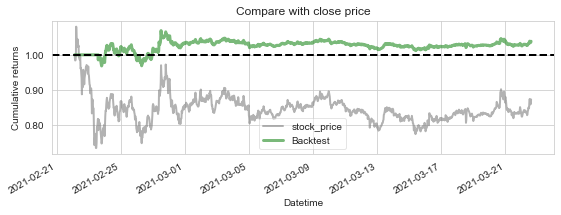

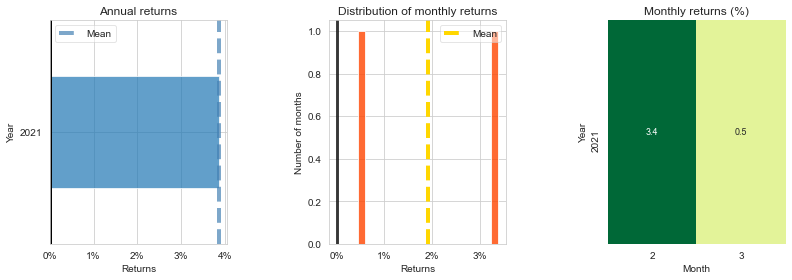

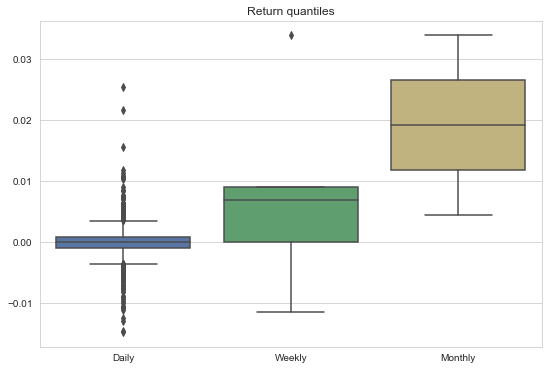

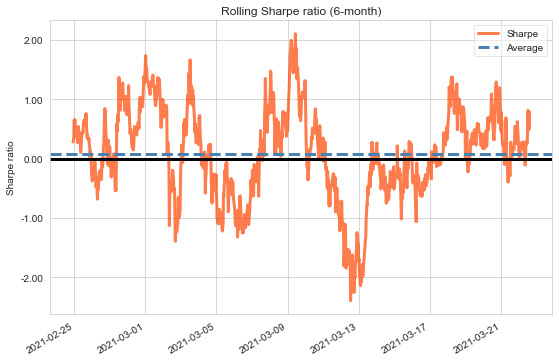

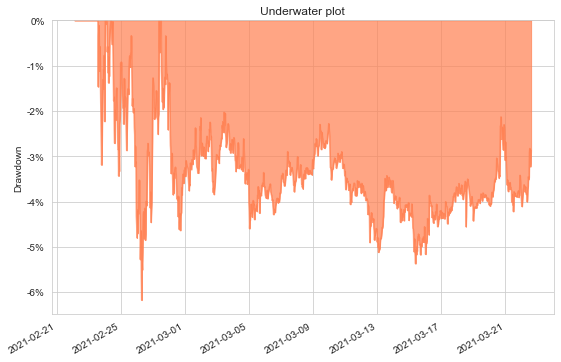

In [9]:


bt_returns = result['portfolio_value'].pct_change()
price = result['stock_price'].pct_change()



plt.figure(figsize=(9,6));
plt.subplot(2,1,1);
pf.plotting.plot_rolling_returns(bt_returns, price);
plt.title('Compare with close price');
plt.show()

fig = plt.figure(1)
plt.subplot(1,3,1)
pf.plot_annual_returns(bt_returns)
plt.subplot(1,3,2)
pf.plot_monthly_returns_dist(bt_returns)
plt.subplot(1,3,3)
pf.plot_monthly_returns_heatmap(bt_returns)
plt.tight_layout()
fig.set_size_inches(12,4)

plt.figure(figsize=(9,6))
pf.plot_return_quantiles(bt_returns);



plt.figure(figsize=(9,6))
pf.plot_rolling_sharpe(bt_returns);

plt.figure(figsize=(9,6))
pf.plot_drawdown_underwater(bt_returns);

score = (sharpe(result, 0.011) - sharpe(test_data, 0.011))*10
ret = ((result['portfolio_value'][-1] - result['portfolio_value'][0])/result['portfolio_value'][0]) * 100
with open(f'score/{stock_name}.pkl', 'wb') as f:  # Python 3: open(..., 'wb')
    pickle.dump([stock_name, industry,score, ret], f)
    
    
result.to_csv(f'../data/{stock_name}.csv')